In [1]:

import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.io import imread
from tensorflow.keras import layers
import keras.preprocessing.image as iu
import cv2

In [2]:
'''
FOLDER STRUCTURE:
/data/gn_train
      train
      gn_test
      test

IMAGE OBJECTS:
train_gn_img
train_img
test_gn_img
test_img

ARRAY OBJECTS:
train_gn_arr
train_arr
train_gn_sc
train_sc
... and the same for test ...


'''

'\nFOLDER STRUCTURE:\n/data/gn_train\n      train\n      gn_test\n      test\n\nIMAGE OBJECTS:\ntrain_gn_img\ntrain_img\ntest_gn_img\ntest_img\n\nARRAY OBJECTS:\ntrain_gn_arr\ntrain_arr\ntrain_gn_sc\ntrain_sc\n... and the same for test ...\n\n\n'

In [3]:
path = './nordata/'

In [4]:
train_images = os.listdir(path + 'or_train')
test_images = os.listdir(path + 'or_test')
train_gn_images = os.listdir(path + 'gn_train')
test_gn_images = os.listdir(path + 'gn_test')

In [5]:
from keras.preprocessing.image import image_utils as iu

train_img = []
train_gn_img = []
test_img = []
test_gn_img = []
for k in range(len(train_images)):
    train_img.append(iu.load_img(path + 'or_train/' + train_images[k]))
    train_gn_img.append(iu.load_img(path + 'gn_train/' + train_gn_images[k]))
for k in range(len(test_images)):
    test_img.append(iu.load_img(path + 'or_test/' + test_images[k]))
    test_gn_img.append(iu.load_img(path + 'gn_test/' + test_gn_images[k]))
    

In [6]:
train_arr = []
train_gn_arr = []
for k in range(len(train_img)):
    train_arr.append(np.array(iu.img_to_array(train_img[k]))/255)
    train_gn_arr.append(np.array(iu.img_to_array(train_gn_img[k]))/255)

In [7]:
test_arr = []
test_gn_arr = []
for k in range(len(test_img)):
    test_arr.append(np.array(iu.img_to_array(test_img[k]))/255)
    test_gn_arr.append(np.array(iu.img_to_array(test_gn_img[k]))/255)

In [8]:
input_shape = (412,412)

In [9]:
train_gn_sc = []
train_sc = []
for item in range(len(train_gn_arr)):
    train_sc.append(cv2.resize(train_arr[item], input_shape, interpolation = cv2.INTER_AREA))
    train_gn_sc.append(cv2.resize(train_gn_arr[item], input_shape, interpolation = cv2.INTER_AREA))

In [10]:
import keras
model = keras.models.load_model('./model_gn.h5')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 412, 412, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 412, 412, 16)      448       
                                                                 
 batch_normalization_1 (Batc  (None, 412, 412, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 412, 412, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 206, 206, 16)     0         
 )                                                               
                                                        

In [12]:
'''
import tensorflow.keras.backend as K
K.clear_session()
#'''

'\nimport tensorflow.keras.backend as K\nK.clear_session()\n#'

In [13]:
'''
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),
              metrics=["accuracy"],
              loss = 'mse'
)
#'''

'\nmodel.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),\n              metrics=["accuracy"],\n              loss = \'mse\'\n)\n#'

In [14]:
#model.fit(np.array(train_gn_sc), np.array(train_sc), batch_size=32, epochs=32, validation_split=0.2)

In [15]:
test_gn_sc = []
test_sc = []
for item in range(len(test_gn_arr)):
    test_sc.append(resize(test_arr[item],input_shape))
    test_gn_sc.append(resize(test_gn_arr[item],input_shape))

In [16]:
output = model.predict(np.array(test_gn_sc).reshape(-1,412,412,3))

4/4 [==============================] - 5s 971ms/step


In [17]:
imid = 63

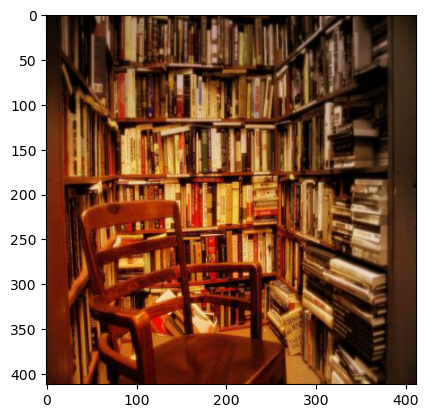

In [18]:
plt.imshow(test_sc[imid])

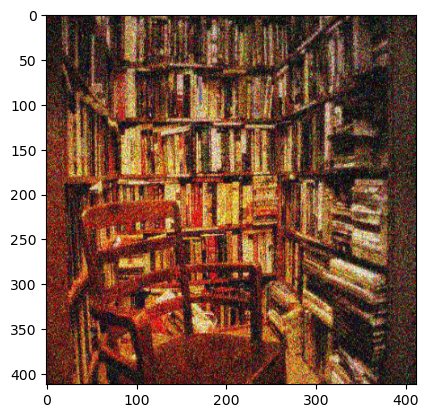

In [19]:
plt.imshow(test_gn_sc[imid])

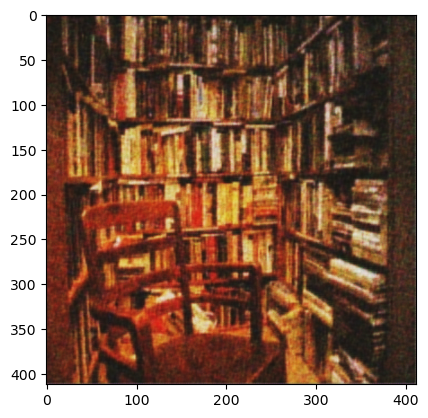

In [20]:
plt.imshow(output[imid])